<center>
# How to calculate shear
</center>

***

In [1]:
# This cell prints today's date for reference. This comment can be deleted.
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 17 July, 2019


***
## Outline: 

The brightwind library allows for shear to be calculated from anemometer measurement data using either the power law or the logarithmic law, through the calculation of the shear exponent (alpha) or the roughness coefficient respectively. Alpha/roughness values can be calculated by average windspeed, time of day/month, direction sector or by individual timestamp. The calculated shear can then be applied to wind timeseries data to scale wind speeds from one height to another.

This tutorial will cover: 
1. How to calculate average shear and use it to scale wind timeseries data.
1. How to calculate shear by direction sector and use it to scale wind timeseries data.
1. How to calculate shear by time of day and month and use it to scale wind timeseries data.
1. How to calculate shear by individual timestamp and use it to scale wind timeseries data.
1. How to scale a timeseries to a specific height using a fixed value of alpha/roughness.


***

### Step 1: Calculating and applying average shear across a time series
The average shear exponent can be calculated across an entire timeseries using the <em>Average</em> class in the brightwind library.

- First, upload the relevant data, defining the anemometers data and heights of these anemometers.

In [2]:
import brightwind as bw

# load data as dataframe
#data = bw.load_csv(r'C:\...\brightwind\datasets\demo\demo_data.csv') 
data = bw.load_csv(r'C:\Users\lukec\demo_data.csv')

# Specify columns in data which contain the anemometer measurements from which to calculate shear
anemometers = data[['Spd80mN','Spd60mN','Spd40mN']]

# Specify the heights of these anemometers
heights = [80,60,40]

- To calculate average shear from the data contained in <em> anemometers</em> using the power law, type the following:

C:\Users\lukec\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Gotham Rounded'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


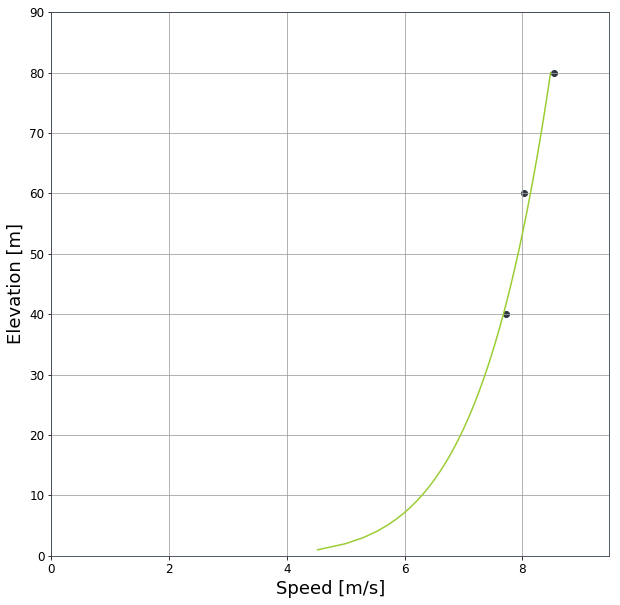

In [3]:
avg_shear_by_power_law = bw.Shear.Average(anemometers, heights)

- To calculate shear using the log law instead of the power law, simply add the argument <em>'calc_method='log_law'</em>. This is an option for all shear calculations. 

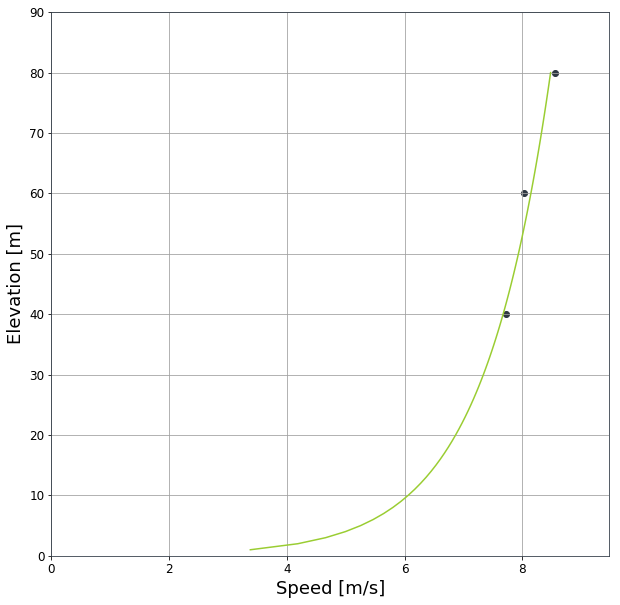

In [4]:
avg_shear_by_log_law = bw.Shear.Average(anemometers, heights, calc_method='log_law')

- This function returns an object, i.e. <em> avg_shear_by_power_law </em> or  <em> avg_shear_by_log_law </em>, which contains lots of information about the calcualtion which was carried out. 

- To view what information is available, such as a plot and the average alpha value, type the following and press 'Tab':

<div style='margin-top: 3em; margin-bottom: 3em;'>
<center>
![image1](images/how_to_calculate_shear_1.png)
</center>
</div>

- To show the average alpha calculated, type: 

In [5]:
avg_shear_by_power_law.alpha

0.14343968482876332

- To show the average roughness calculated, type: 

In [6]:
avg_shear_by_log_law.roughness

0.05488000270170498

- To show the plot, type:

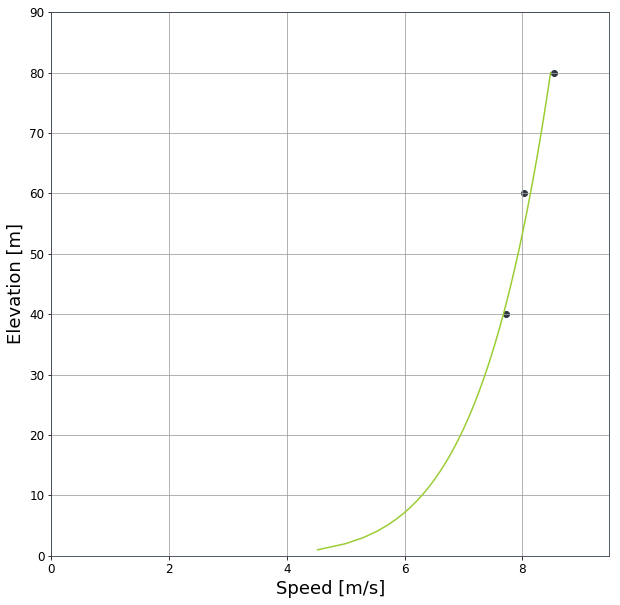

In [7]:
avg_shear_by_power_law.plot

- Other useful information about the object can be obtained using <em>.info</em>:

In [8]:
avg_shear_by_log_law.info

{'input data': {'input_wind_speeds': {'heights(m)': [80, 60, 40],
   'column_names': ['Spd80mN', 'Spd60mN', 'Spd40mN'],
   'min_spd(m/s)': 3},
  'calculation_method': 'log_law'},
 'output data': {'concurrent_period_in_years': 1.514,
  'roughness': 0.05488000270170498}}


Once the alpha/roughness values have been calculated, they can be applied to wind timeseries data to scale wind speeds from one height to another. 

- To scale the wind timeseries, i.e. data['Spd40mN'], from 40 m height to 80 m height using the average alpha value previously calculated, use the <em>.apply</em> function attached to the avg_shear_by_power_law object. Type:


In [9]:
avg_shear_by_power_law.apply(data['Spd40mN'], 40, 80)

Timestamp
2016-01-09 15:30:00     8.678335
2016-01-09 15:40:00     8.783266
2016-01-09 17:00:00     8.318256
2016-01-09 17:10:00     6.905555
2016-01-09 17:20:00     8.990918
2016-01-09 17:30:00     9.200780
2016-01-09 17:40:00     8.805356
2016-01-09 17:50:00     8.448591
2016-01-09 18:00:00     8.370169
2016-01-09 18:10:00     8.605435
2016-01-09 18:20:00    10.570404
2016-01-09 18:30:00     9.874547
2016-01-09 18:40:00    10.868629
2016-01-09 18:50:00    10.857583
2016-01-09 19:00:00    10.945946
2016-01-09 19:10:00    10.205907
2016-01-09 19:20:00    10.239043
2016-01-09 19:30:00    11.608667
2016-01-09 19:40:00    10.227998
2016-01-09 19:50:00     7.726225
2016-01-09 20:00:00     4.520863
2016-01-09 20:10:00     3.945401
2016-01-09 20:20:00     3.969700
2016-01-09 20:30:00     7.028159
2016-01-09 20:40:00     4.696485
2016-01-09 20:50:00     1.548559
2016-01-09 21:00:00     2.487414
2016-01-09 21:10:00     3.174435
2016-01-09 21:20:00     3.282679
2016-01-09 21:30:00     5.370251


 - To scale the same data, but using the roughness value calculated via the log law, use the <em>.apply</em> function attached to the <em> avg_shear_by_log_law </em> object:

In [10]:
avg_shear_by_log_law.apply(data['Spd40mN'], 40, 80)

Timestamp
2016-01-09 15:30:00     8.683226
2016-01-09 15:40:00     8.788216
2016-01-09 17:00:00     8.322945
2016-01-09 17:10:00     6.909448
2016-01-09 17:20:00     8.995986
2016-01-09 17:30:00     9.205966
2016-01-09 17:40:00     8.810319
2016-01-09 17:50:00     8.453353
2016-01-09 18:00:00     8.374887
2016-01-09 18:10:00     8.610286
2016-01-09 18:20:00    10.576362
2016-01-09 18:30:00     9.880112
2016-01-09 18:40:00    10.874754
2016-01-09 18:50:00    10.863703
2016-01-09 19:00:00    10.952115
2016-01-09 19:10:00    10.211660
2016-01-09 19:20:00    10.244814
2016-01-09 19:30:00    11.615210
2016-01-09 19:40:00    10.233763
2016-01-09 19:50:00     7.730580
2016-01-09 20:00:00     4.523412
2016-01-09 20:10:00     3.947624
2016-01-09 20:20:00     3.971938
2016-01-09 20:30:00     7.032120
2016-01-09 20:40:00     4.699132
2016-01-09 20:50:00     1.549431
2016-01-09 21:00:00     2.488816
2016-01-09 21:10:00     3.176224
2016-01-09 21:20:00     3.284529
2016-01-09 21:30:00     5.373278


***

### Step 2: Calculating and applying average shear by direction
If you have direction measurements to accompany anemometer wind speed measurements, the shear can be calculated for specified direction sectors using the <em>BySector</em> class. 

- For example, load the direction measurements from the uploaded data:

In [11]:
directions = data['Dir78mS']

- Then, to calculate the shear for the default direction bins ( [345,15,45,75,105,135,165,195,225,255,285,315,345]), simply type:

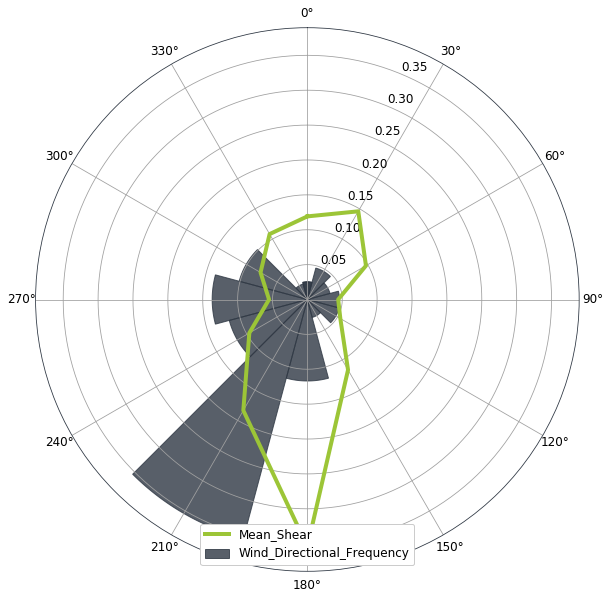

In [12]:
shear_by_sector_power_law = bw.Shear.BySector(anemometers, heights, directions)

- Again, various information such as the alpha values can be displayed from this object:

In [13]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119143
15.0-45.0      0.145930
45.0-75.0      0.096945
75.0-105.0     0.044174
105.0-135.0    0.054541
135.0-165.0    0.116558
165.0-195.0    0.354179
195.0-225.0    0.183611
225.0-255.0    0.096090
255.0-285.0    0.054966
285.0-315.0    0.077509
315.0-345.0    0.108276
dtype: float64


- The direction bins can be defined by the user for use in the BySector calculations. 
- These bins must begin at 0 and be listed as increasing.
- For example, to use the custom bins [0,30,60,90,120,150,180,210,240,270,300,330,360], simply type the following: 

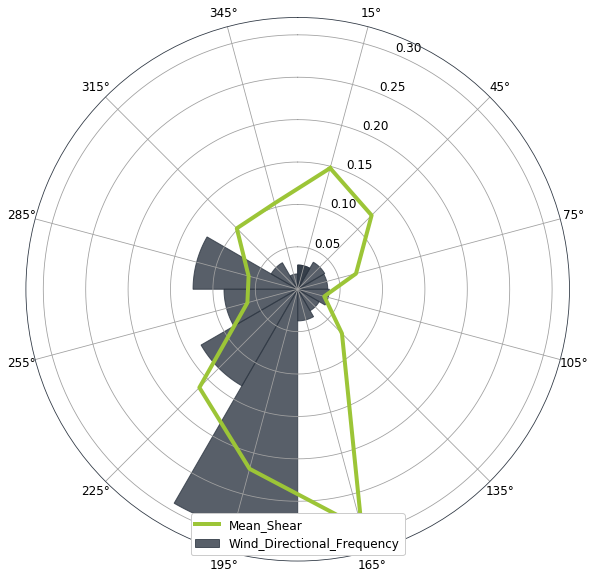

In [14]:
custom_bins = [0,30,60,90,120,150,180,210,240,270,300,330,360]
shear_by_sector_power_law_custom_bins = bw.Shear.BySector(anemometers, heights, directions, direction_bin_array=custom_bins)

In [15]:
shear_by_sector_power_law.alpha

345.0-15.0     0.119143
15.0-45.0      0.145930
45.0-75.0      0.096945
75.0-105.0     0.044174
105.0-135.0    0.054541
135.0-165.0    0.116558
165.0-195.0    0.354179
195.0-225.0    0.183611
225.0-255.0    0.096090
255.0-285.0    0.054966
285.0-315.0    0.077509
315.0-345.0    0.108276
dtype: float64

To scale the same data, but using the alpha values calculated for each direction section use the .apply function attached to the <em>shear_by_sector_by_power_law</em> object. Corresponding wind direction measurements for the wind speeds to be scaled must also be passed to the function.

- Using <em>data['Dir38mS']</em> as the direction measurements, type:

In [16]:
shear_by_sector_power_law.apply(data['Spd40mN'], data['Dir38mS'], 40, 80)

Timestamp
2016-01-09 15:30:00     8.159717
2016-01-09 15:40:00     8.258377
2016-01-09 17:00:00     7.821156
2016-01-09 17:10:00     6.492879
2016-01-09 17:20:00     8.453620
2016-01-09 17:30:00     8.650941
2016-01-09 17:40:00     8.279147
2016-01-09 17:50:00     7.943703
2016-01-09 18:00:00     7.869967
2016-01-09 18:10:00     8.091174
2016-01-09 18:20:00     9.938716
2016-01-09 18:30:00     9.284443
2016-01-09 18:40:00    10.219118
2016-01-09 18:50:00    10.208733
2016-01-09 19:00:00    10.218126
2016-01-09 19:10:00     9.527294
2016-01-09 19:20:00     9.627157
2016-01-09 19:30:00    10.914932
2016-01-09 19:40:00     9.616772
2016-01-09 19:50:00     7.264505
2016-01-09 20:00:00     4.220261
2016-01-09 20:10:00     3.683062
2016-01-09 20:20:00     3.705746
2016-01-09 20:30:00     6.608155
2016-01-09 20:40:00     4.415822
2016-01-09 20:50:00     1.445592
2016-01-09 21:00:00     2.408528
2016-01-09 21:10:00     3.073760
2016-01-09 21:20:00     3.064407
2016-01-09 21:30:00     5.199938


***

### Step 3: Calculating shear by time of day and month
Shear can also be calculated by time of day and month using the <em>TimeOfDay</em> class. To do so, type:

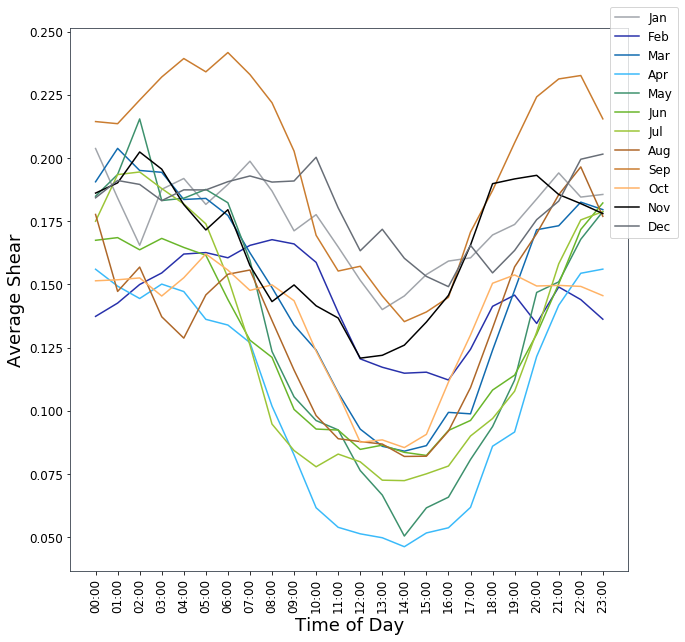

In [17]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24, plot_type='line')

- The alpha values calculated are saved in a DataFrame and can be accessed using <em>.alpha</em>:

In [18]:
shear_by_tod_power_law.alpha

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
00:00:00,0.203745,0.137365,0.190585,0.156005,0.184894,0.167457,0.174981,0.177678,0.214404,0.151436,0.186120,0.184245
01:00:00,0.184187,0.142620,0.203802,0.149316,0.193490,0.168509,0.193434,0.147225,0.213561,0.151838,0.190170,0.191104
02:00:00,0.165501,0.149974,0.195065,0.144426,0.215443,0.163694,0.194465,0.156861,0.222912,0.152570,0.202378,0.189549
03:00:00,0.187611,0.154534,0.194339,0.150126,0.183169,0.168200,0.187914,0.137204,0.232028,0.145416,0.195578,0.183143
04:00:00,0.191893,0.162013,0.183595,0.147184,0.184090,0.164632,0.181813,0.128768,0.239333,0.152643,0.181578,0.187397
05:00:00,0.181648,0.162595,0.184018,0.136194,0.187579,0.161545,0.173963,0.145848,0.234071,0.162066,0.171548,0.187372
06:00:00,0.189527,0.160536,0.177278,0.133937,0.182293,0.144034,0.152627,0.154029,0.241704,0.155654,0.179550,0.190635
07:00:00,0.198724,0.165445,0.162500,0.126975,0.159511,0.127946,0.126003,0.155703,0.232996,0.147648,0.157465,0.192888
08:00:00,0.186950,0.167700,0.148741,0.101867,0.123486,0.121164,0.094774,0.135711,0.221852,0.149835,0.143209,0.190476
09:00:00,0.171201,0.166015,0.133946,0.082590,0.105539,0.100572,0.084312,0.116124,0.202722,0.143551,0.149797,0.190909


- Arguments such as <em> segments_per_day</em> and <em>segement_start_time</em> can be set to specify the number of daily bins and the start time of the first bin. Different plot types are also available, such as <em>'step'</em> and <em>'12x24'</em>, shown below.

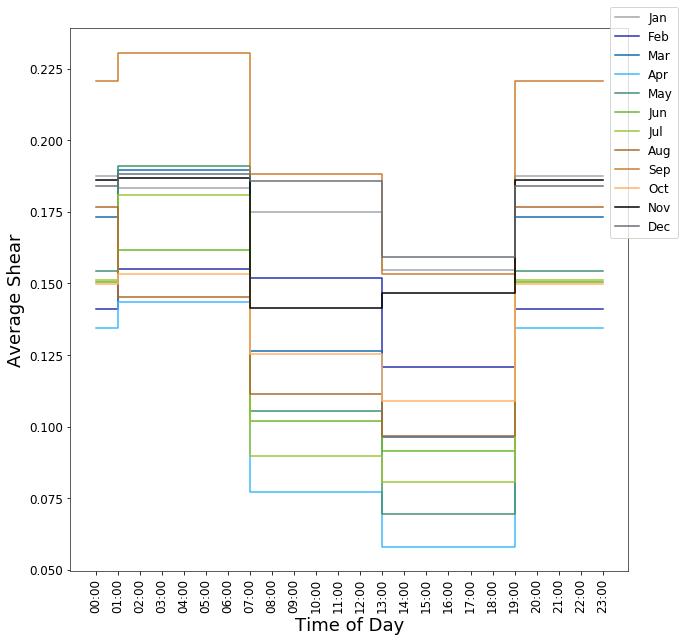

In [19]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=4, segment_start_time=7, plot_type='step')

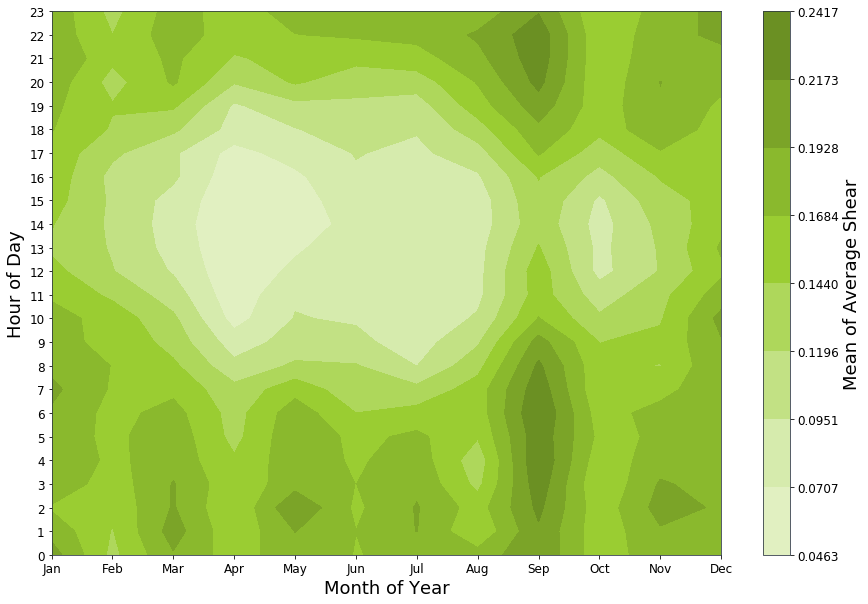

In [20]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=24, segment_start_time=7, plot_type='12x24')

- By setting <em>by_month</em> to False, shear is averaged over all months for each daily bin:

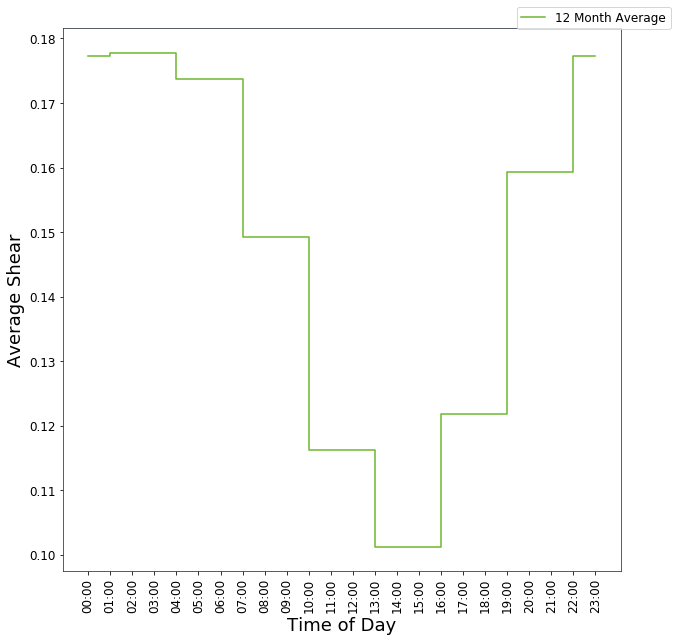

In [21]:
shear_by_tod_power_law = bw.Shear.TimeOfDay(anemometers, heights, segments_per_day=8, segment_start_time=7, by_month=False, plot_type='step')

To apply the shear values calculated, as previously:

In [22]:
shear_by_tod_power_law.apply(data['Spd40mN'],40,80)

FloatProgress(value=0.0, bar_style='success', description='Calculating', max=288.0)

2016-01-09 15:30:00     8.428344
2016-01-09 15:40:00     8.530252
2016-01-09 17:00:00     8.194156
2016-01-09 17:10:00     6.802531
2016-01-09 17:20:00     8.856783
2016-01-09 17:30:00     9.063513
2016-01-09 17:40:00     8.673989
2016-01-09 17:50:00     8.322547
2016-01-09 18:00:00     8.245295
2016-01-09 18:10:00     8.477051
2016-01-09 18:20:00    10.412704
2016-01-09 18:30:00     9.727228
2016-01-09 18:40:00    10.706479
2016-01-09 18:50:00    10.695599
2016-01-09 19:00:00    11.066595
2016-01-09 19:10:00    10.318399
2016-01-09 19:20:00    10.351901
2016-01-09 19:30:00    11.736621
2016-01-09 19:40:00    10.340734
2016-01-09 19:50:00     7.811386
2016-01-09 20:00:00     4.570694
2016-01-09 20:10:00     3.988888
2016-01-09 20:20:00     4.013455
2016-01-09 20:30:00     7.105625
2016-01-09 20:40:00     4.748250
2016-01-09 20:50:00     1.565627
2016-01-09 21:00:00     2.514831
2016-01-09 21:10:00     3.209424
2016-01-09 21:20:00     3.318862
2016-01-09 21:30:00     5.429443
          

### Step 4: Calculating shear by timestamp
Shear can be calculated for each individual timestamp of a wind series using the <em>TimeSeries</em> class. This takes some time, as tens of thousands of calculations must be carried out, so try it first on a subset of the data, i.e. the first 1000 entries. To do so, type:

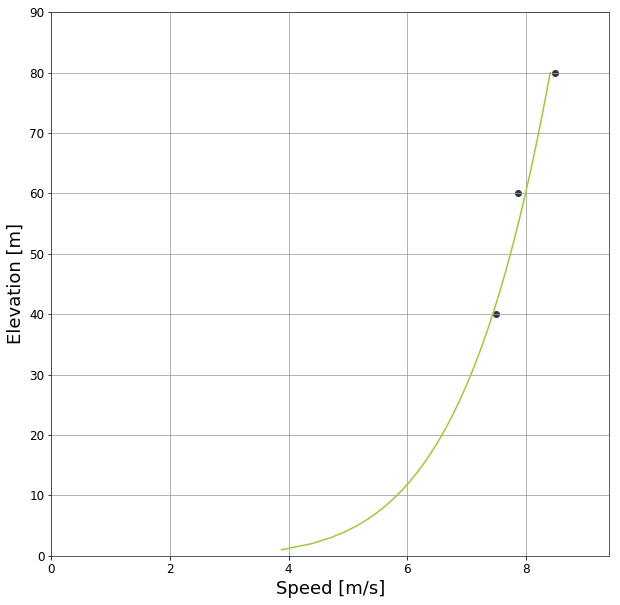

In [23]:
anemometers_subset = anemometers[:1000]
ts_by_power_law = bw.Shear.TimeSeries(anemometers_subset, heights)

In other methods such as <em>Average</em> and <em>BySector</em>, shear is only calculated for each time stamp where an anemometer reading exists at each height. This can be problamatic when calculating shear by individual timestamp. To maximise the ammount of data used for shear calculations and increase coverage, i.e. calculate shear for every timestamp where two or more anemometer readings exist, pass the <em>maximise_data=True</em> argument to the function. Please be aware that due to the nature of calculating shear for every timestamp, this function takes some time to run.

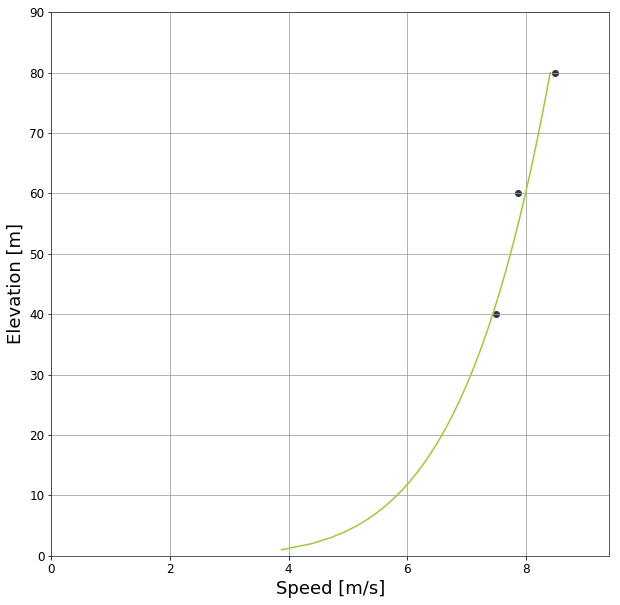

In [24]:
ts_by_power_law_max = bw.Shear.TimeSeries(anemometers_subset, heights,maximise_data=True)

- As can be seen in the <em> info </em> of each object, the coverage increased when <em>maximise_data</em> was used.  

In [25]:
ts_by_power_law.info

{'input data': {'input_wind_speeds': {'heights(m)': [80, 60, 40],
   'column_names': ['Spd80mN', 'Spd60mN', 'Spd40mN'],
   'min_spd(m/s)': 3},
  'calculation_method': 'power_law'},
 'output data': {'concurrent_period_in_years': 0.016, 'alpha': Timestamp
  2016-01-09 15:30:00    0.091385
  2016-01-09 15:40:00    0.052578
  2016-01-09 17:00:00    0.024468
  2016-01-09 17:10:00    0.237991
  2016-01-09 17:20:00   -0.027865
  2016-01-09 17:30:00    0.002393
  2016-01-09 17:40:00    0.028834
  2016-01-09 17:50:00   -0.028915
  2016-01-09 18:00:00   -0.006296
  2016-01-09 18:10:00    0.078150
  2016-01-09 18:20:00   -0.019781
  2016-01-09 18:30:00    0.150555
  2016-01-09 18:40:00    0.080081
  2016-01-09 18:50:00    0.078663
  2016-01-09 19:00:00    0.007701
  2016-01-09 19:10:00    0.060346
  2016-01-09 19:20:00    0.049886
  2016-01-09 19:30:00    0.001436
  2016-01-09 19:40:00   -0.044120
  2016-01-09 19:50:00    0.068740
  2016-01-09 20:00:00    0.376291
  2016-01-09 20:10:00    0.18649

In [26]:
ts_by_power_law_max.info

{'input data': {'input_wind_speeds': {'heights(m)': [80, 60, 40],
   'column_names': ['Spd80mN', 'Spd60mN', 'Spd40mN'],
   'min_spd(m/s)': 3},
  'calculation_method': 'power_law'},
 'output data': {'concurrent_period_in_years': 0.017, 'alpha': Timestamp
  2016-01-09 15:30:00    0.091385
  2016-01-09 15:40:00    0.052578
  2016-01-09 17:00:00    0.024468
  2016-01-09 17:10:00    0.237991
  2016-01-09 17:20:00   -0.027865
  2016-01-09 17:30:00    0.002393
  2016-01-09 17:40:00    0.028834
  2016-01-09 17:50:00   -0.028915
  2016-01-09 18:00:00   -0.006296
  2016-01-09 18:10:00    0.078150
  2016-01-09 18:20:00   -0.019781
  2016-01-09 18:30:00    0.150555
  2016-01-09 18:40:00    0.080081
  2016-01-09 18:50:00    0.078663
  2016-01-09 19:00:00    0.007701
  2016-01-09 19:10:00    0.060346
  2016-01-09 19:20:00    0.049886
  2016-01-09 19:30:00    0.001436
  2016-01-09 19:40:00   -0.044120
  2016-01-09 19:50:00    0.068740
  2016-01-09 20:00:00    0.376291
  2016-01-09 20:10:00    0.18649

To apply the alpha values calculated to a wind series with corresponding timestamps:

In [27]:
ts_by_power_law.apply(data['Spd40mN'],40,80)

Timestamp
2016-01-09 15:30:00     8.370790
2016-01-09 15:40:00     8.247149
2016-01-09 17:00:00     7.659813
2016-01-09 17:10:00     7.373289
2016-01-09 17:20:00     7.984289
2016-01-09 17:30:00     8.343827
2016-01-09 17:40:00     8.132932
2016-01-09 17:50:00     7.497220
2016-01-09 18:00:00     7.544999
2016-01-09 18:10:00     8.224676
2016-01-09 18:20:00     9.439682
2016-01-09 18:30:00     9.923366
2016-01-09 18:40:00    10.401644
2016-01-09 18:50:00    10.380859
2016-01-09 19:00:00     9.963039
2016-01-09 19:10:00     9.634695
2016-01-09 19:20:00     9.596144
2016-01-09 19:30:00    10.520466
2016-01-09 19:40:00     8.981103
2016-01-09 19:50:00     7.336360
2016-01-09 20:00:00     5.312718
2016-01-09 20:10:00     4.064911
2016-01-09 20:20:00     3.636131
2016-01-09 20:30:00     6.869537
2016-01-09 20:40:00     3.526583
2016-01-09 21:30:00     6.484760
2016-01-09 21:40:00     7.483966
2016-01-09 21:50:00     6.230983
2016-01-09 22:00:00     5.958153
2016-01-09 22:10:00     5.635895


### Step 4: Scale a timeseries using a fixed alpha/roughness value

Timeseries data can also be scaled using a user-defined fixed value for alpha or roughness. 

- For example, to scale the wind speed measurements, <em>data['Spd40mN']</em>, from 40 m to 80 m, using an alpha value of .2, type:

In [28]:
bw.Shear.scale(data['Spd40mN'], 40, 80, alpha = .2)

Timestamp
2016-01-09 15:30:00     9.025323
2016-01-09 15:40:00     9.134449
2016-01-09 17:00:00     8.650847
2016-01-09 17:10:00     7.181662
2016-01-09 17:20:00     9.350405
2016-01-09 17:30:00     9.568657
2016-01-09 17:40:00     9.157423
2016-01-09 17:50:00     8.786394
2016-01-09 18:00:00     8.704836
2016-01-09 18:10:00     8.949509
2016-01-09 18:20:00    10.993043
2016-01-09 18:30:00    10.269363
2016-01-09 18:40:00    11.303192
2016-01-09 18:50:00    11.291705
2016-01-09 19:00:00    11.383601
2016-01-09 19:10:00    10.613973
2016-01-09 19:20:00    10.648434
2016-01-09 19:30:00    12.072820
2016-01-09 19:40:00    10.636947
2016-01-09 19:50:00     8.035145
2016-01-09 20:00:00     4.701622
2016-01-09 20:10:00     4.103151
2016-01-09 20:20:00     4.128422
2016-01-09 20:30:00     7.309168
2016-01-09 20:40:00     4.884265
2016-01-09 20:50:00     1.610475
2016-01-09 21:00:00     2.586869
2016-01-09 21:10:00     3.301359
2016-01-09 21:20:00     3.413932
2016-01-09 21:30:00     5.584971


- To scale the wind speed measurements, <em>data['Spd40mN']</em>, from 40 m to 80 m, using a roughness of .3, type:

In [29]:
bw.Shear.scale(data['Spd40mN'], 40, 80, roughness_coefficient = .3, calc_method='log_law')

Timestamp
2016-01-09 15:30:00     8.970064
2016-01-09 15:40:00     9.078522
2016-01-09 17:00:00     8.597881
2016-01-09 17:10:00     7.137691
2016-01-09 17:20:00     9.293155
2016-01-09 17:30:00     9.510072
2016-01-09 17:40:00     9.101355
2016-01-09 17:50:00     8.732598
2016-01-09 18:00:00     8.651539
2016-01-09 18:10:00     8.894714
2016-01-09 18:20:00    10.925737
2016-01-09 18:30:00    10.206487
2016-01-09 18:40:00    11.233986
2016-01-09 18:50:00    11.222569
2016-01-09 19:00:00    11.313903
2016-01-09 19:10:00    10.548987
2016-01-09 19:20:00    10.583237
2016-01-09 19:30:00    11.998902
2016-01-09 19:40:00    10.571820
2016-01-09 19:50:00     7.985948
2016-01-09 20:00:00     4.672836
2016-01-09 20:10:00     4.078028
2016-01-09 20:20:00     4.103145
2016-01-09 20:30:00     7.264416
2016-01-09 20:40:00     4.854361
2016-01-09 20:50:00     1.600615
2016-01-09 21:00:00     2.571030
2016-01-09 21:10:00     3.281146
2016-01-09 21:20:00     3.393029
2016-01-09 21:30:00     5.550776


***
This tutorial can be downloaded as a Jupyter Notebook from the following link:
<br>
https://github.com/brightwind-dev/brightwind/tree/master/docs/source/tutorials/how_to_calculate_shear.ipynb

***